### Exploratory Data Analysis

In [2]:
import pandas as pd #numeric calculations
import numpy as np #numeric calculations
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import re #regular expressions for text cleaning


In [3]:
#loading dataset
df = pd.read_excel(r"C:\Users\aarat\Desktop\Bvoc IT\sem6\proj_s6\main\emscad_cleaned_excel.xlsx")

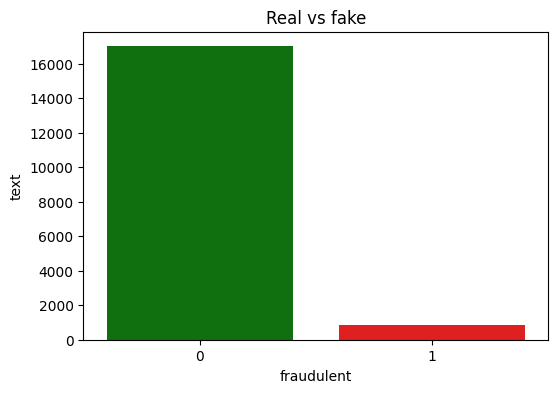

In [4]:
#count plot graph for showing Real & fake values
def real_fake(data):
    plt.figure(figsize=(6,4))
    sns.countplot(x = "fraudulent",data=data , palette=["green","red"],hue="fraudulent", legend=False)
    plt.title("Real vs fake")
    plt.xlabel("fraudulent")
    plt.ylabel("text")
    plt.show()

real_fake(df)    

                    job_id  telecommuting  has_company_logo  has_questions  \
job_id            1.000000      -0.004559         -0.014539      -0.087025   
telecommuting    -0.004559       1.000000         -0.019836       0.020345   
has_company_logo -0.014539      -0.019836          1.000000       0.233932   
has_questions    -0.087025       0.020345          0.233932       1.000000   
fraudulent        0.079872       0.034523         -0.261971      -0.091627   

                  fraudulent  
job_id              0.079872  
telecommuting       0.034523  
has_company_logo   -0.261971  
has_questions      -0.091627  
fraudulent          1.000000  


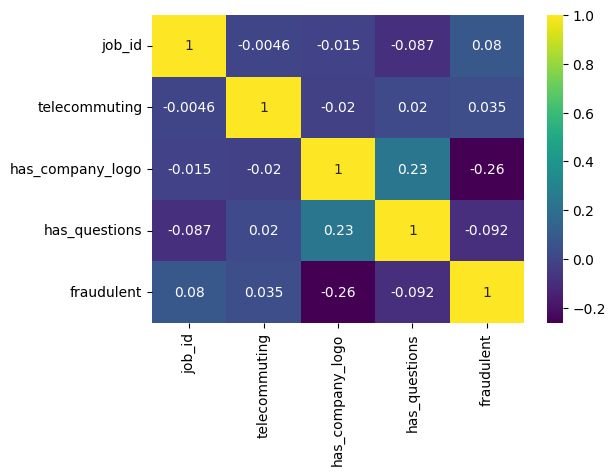

In [3]:
#to create a correlation matrix to study the relationship btw numeric data
numeric_df = (df.select_dtypes(include=('Int64','Float64'))).corr()#computing correlation
print(numeric_df)

#plotting the correlation matrix in heat map
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df,cmap="viridis",annot=True,fmt=".2g")
plt.show()


Number of outliers detected: 668


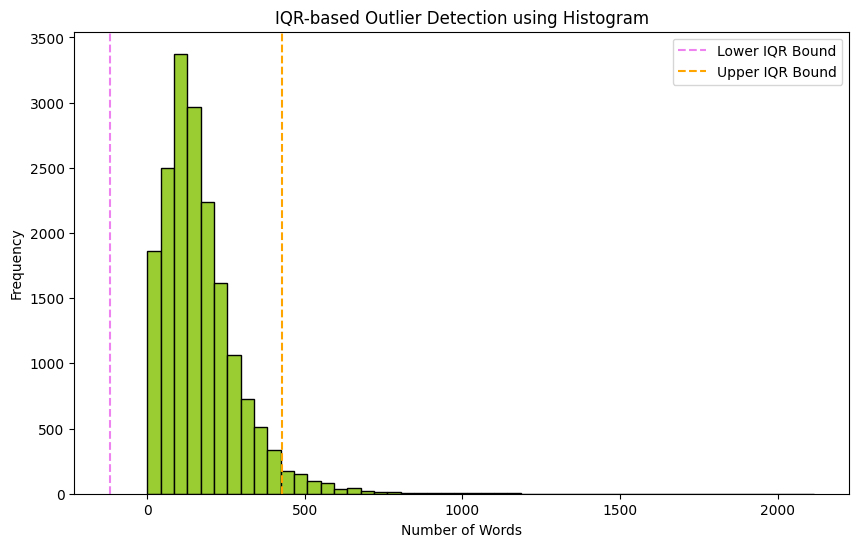

In [4]:

#iqr method for outlier detection
df["text_length"] = df["description"].apply(lambda x: len(str(x).split()))
q1 = df["text_length"].quantile(0.25)
q3 = df["text_length"].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df["text_length"] < lower_bound) | (df["text_length"] > upper_bound)]
print("Number of outliers detected:", outliers.shape[0])


plt.figure(figsize=(10,6))
plt.hist(df["text_length"], bins=50 , color = 'yellowgreen', edgecolor = 'black' )
plt.axvline(lower_bound, linestyle='--', label='Lower IQR Bound', color = 'violet')
plt.axvline(upper_bound, linestyle='--', label='Upper IQR Bound', color = 'orange')
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("IQR-based Outlier Detection using Histogram")
plt.legend()
plt.show()

In [5]:
us_df = df[df["country"]=="US"] #filtering only US states
us_df =us_df[us_df["state"]!='""']
print(us_df["state"].unique())
#table

[' OH' ' PA' ' MA' ' IL' ' MN' ' MI' ' CA' ' WI' ' MO' ' GA' ' WA' ' FL'
 ' NY' ' TX' ' IN' ' CT' ' KY' ' VA' ' NV' ' DC' ' NJ' ' KS' ' DE' ' NC'
 ' TN' ' LA' ' OK' ' OR' ' MD' ' UT' ' AK' ' ID' ' NE' ' SD' ' ME' ' WY'
 ' IA' ' AZ' ' CO' ' SC' ' NM' ' RI' ' AR' ' MT' ' WV' ' ND' ' NH' ' MS'
 ' AL' ' HI' ' VT']


C:\Users\aarat\AppData\Local\Temp\ipykernel_25808\1043523445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_count.index, y=state_count.values ,palette="plasma",)


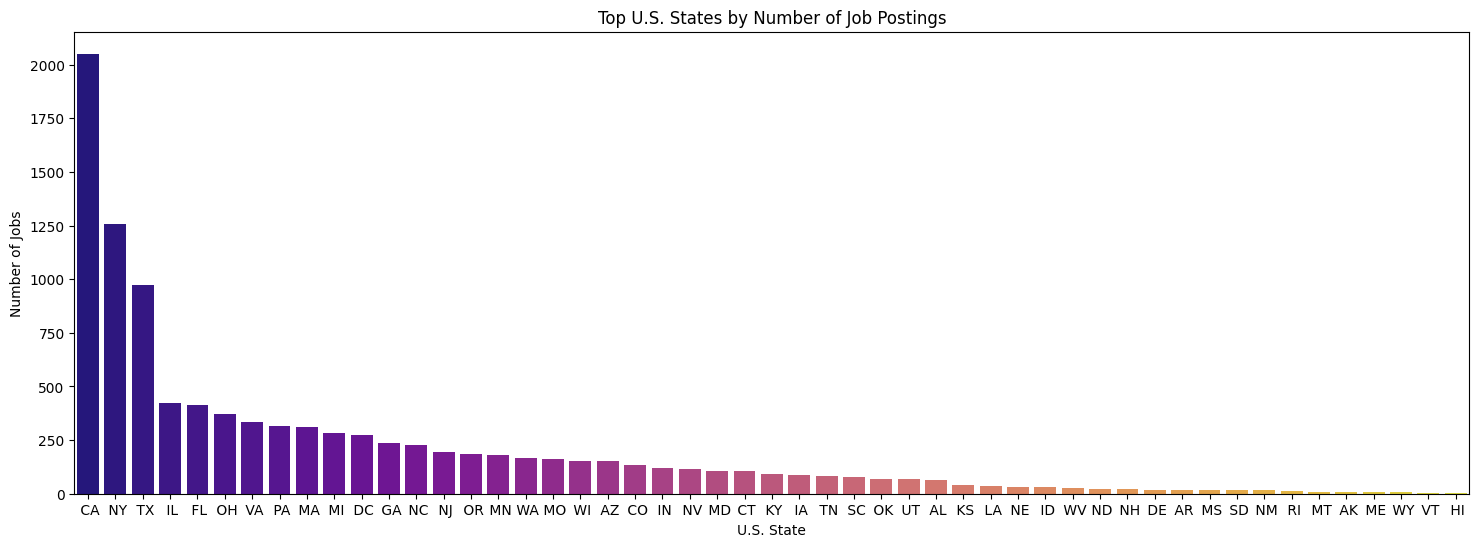

In [6]:
#bar chart plots that in which state in us produces the greatest number of jobs

state_count = us_df["state"].value_counts()
state_count = state_count[state_count.index != '""'] #removing the null values from state column
plt.figure(figsize=(18,6))
sns.barplot(x=state_count.index, y=state_count.values ,palette="plasma",)
plt.title("Top U.S. States by Number of Job Postings")
plt.xlabel("U.S. State")
plt.ylabel("Number of Jobs")
plt.show()

country
US    730
AU     40
GB     23
MY     12
CA     12
QA      6
BH      5
IN      4
PL      3
TW      2
ID      1
SA      1
BR      1
ZA      1
PK      1
PH      1
EG      1
ES      1
EE      1
AE      1
Name: count, dtype: int64


C:\Users\aarat\AppData\Local\Temp\ipykernel_25808\2805403645.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_countries.index , y =top10_countries["Fake jobs"] ,palette="magma")


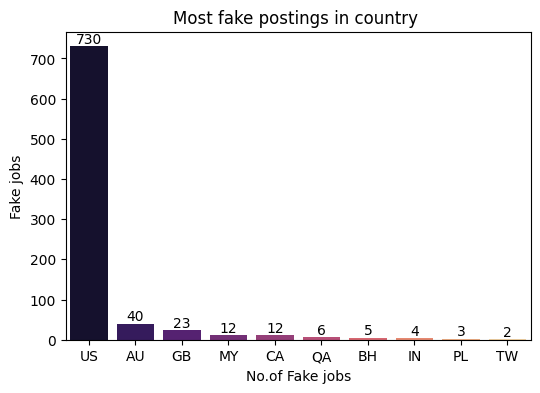

In [7]:
#In which country has most fake jobs
fake_df = df[df["fraudulent"]==1]
fake_df=fake_df[fake_df["country"] != '""']
country_fake = fake_df["country"].value_counts()
print(country_fake)
#converting to df
country_fake_df = country_fake.to_frame(name="Fake jobs")
top10_countries = country_fake_df.head(10)

#using bar chart for plotting it

plt.figure(figsize=(6,4))
sns.barplot(x=top10_countries.index , y =top10_countries["Fake jobs"] ,palette="magma")

#this loop is used for representing the value of each bar.
for i, value in enumerate(top10_countries["Fake jobs"]): #i-position of bar , value - no.of fake jobs
    plt.text(i, value, str(value), ha="center", va="bottom") 

plt.title("Most fake postings in country ")
plt.xlabel("No.of Fake jobs")
plt.show()
#percentage case

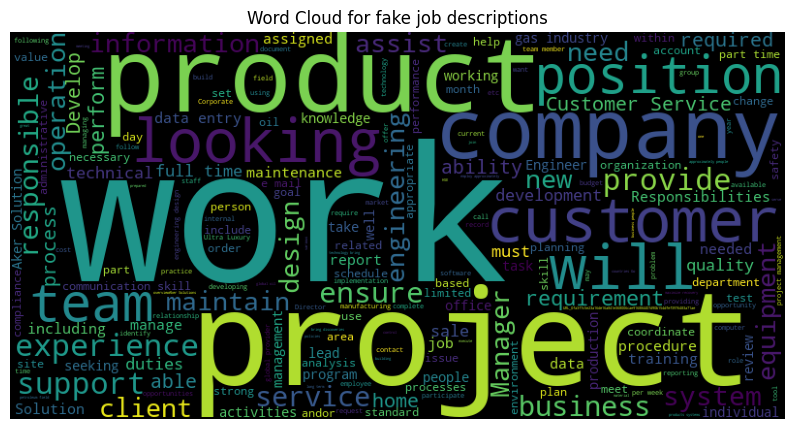

In [8]:
#word cloud visualization
from wordcloud import WordCloud
fake_jobs = " ".join(df[df["fraudulent"]==1]['description'].astype(str))

plt.figure(figsize=(10,6))
wc = WordCloud(width = 800 , height = 400).generate(fake_jobs)
plt.axis("off")
plt.imshow(wc)
plt.title("Word Cloud for fake job descriptions")
plt.show()

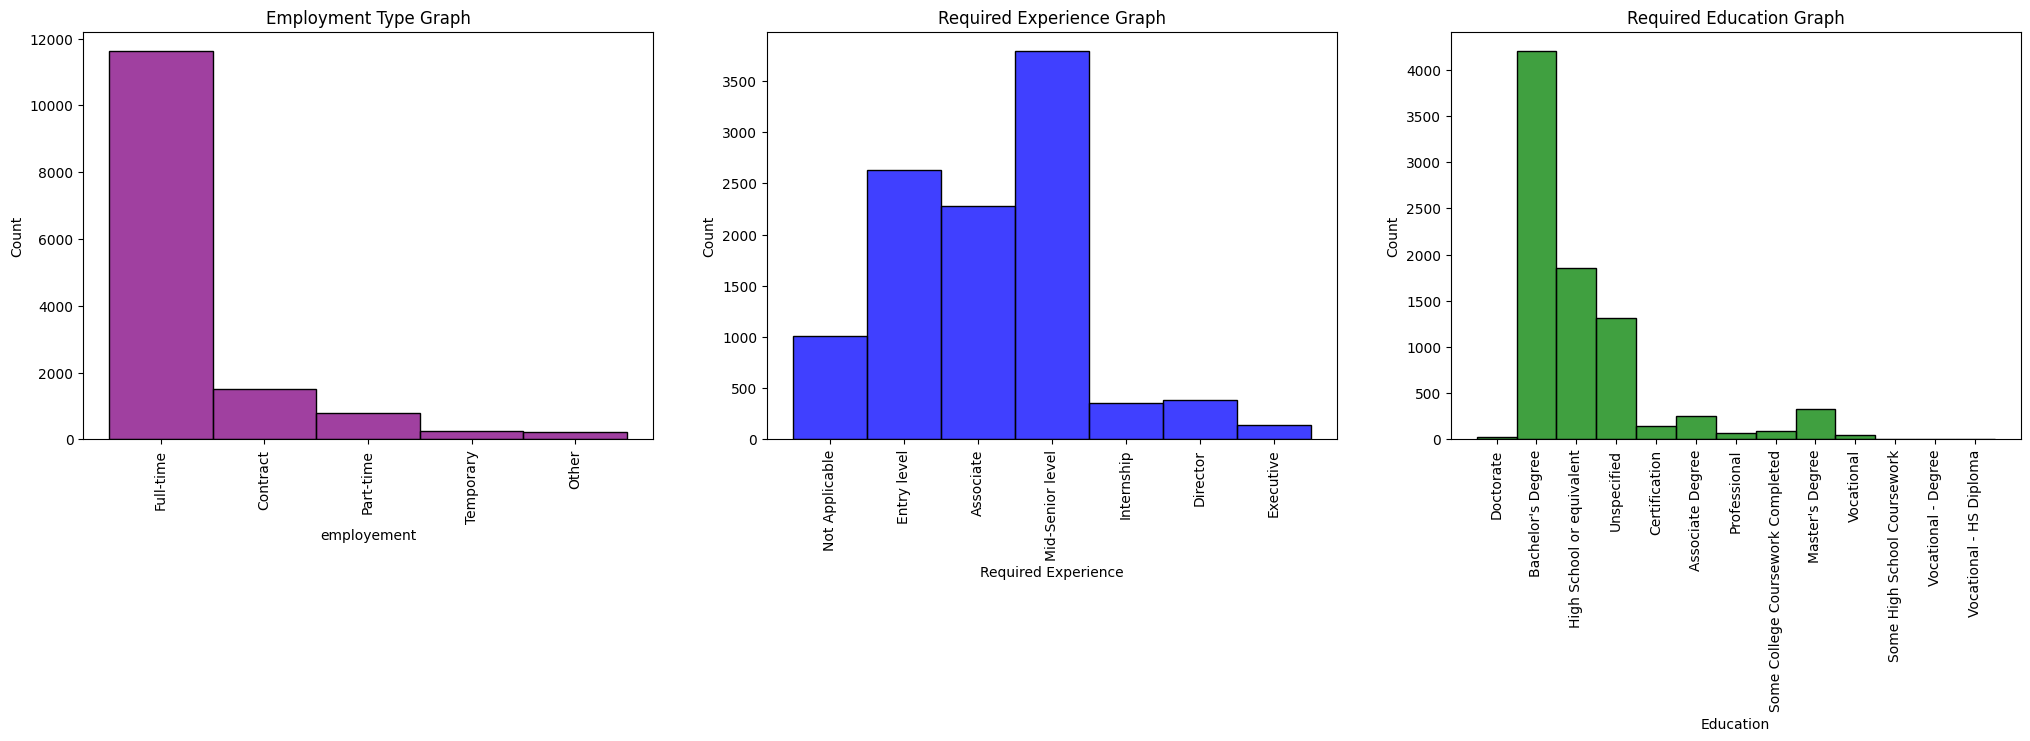

In [9]:
#plots to see the distribution of continous features indivdually

plt.figure(figsize=(25,18))

df = df[df["employment_type"] != '""']
plt.subplot(3,3,1)
sns.histplot(df["employment_type"],color="purple")
plt.title("Employment Type Graph")
plt.xlabel("employement")
plt.xticks(rotation=90)

df = df[df["required_experience"] != '""']
plt.subplot(3,3,2)
sns.histplot(df["required_experience"],color="blue")
plt.title("Required Experience Graph")
plt.xlabel("Required Experience")
plt.xticks(rotation=90)

df = df[df["required_education"] != '""']
plt.subplot(3,3,3)
sns.histplot(df["required_education"],color="green")
plt.title("Required Education Graph")
plt.xlabel("Education")
plt.xticks(rotation=90)

plt.show()

In [10]:
for state in df["state"]:
    print(state)

#print(df["state"])

 MN
 NY
 OK
 FL
 FL
 VA
 TX
 MA
 FL
 CA
 NY
 CA
 IN
 NY
 IL
 CA
 CA
 NY
""
 KY
 NJ
 NC
 CA
 NY
 CA
 OR
 MI
 TX
 CA
 CA
 FL
 MN
 TX
 CA
 CA
 CA
 CA
 TX
 DE
 DE
 FL
 CA
 FL
 IL
 CA
 OR
 VA
 PA
 KY
 GA
 CA
 VA
 VA
 NY
 CA
 PA
 IL
 MD
 PA
 VA
 DC
 FL
 NY
 NY
 NY
 DC
 PA
 GA
 DC
 NY
 CA
 CA
 CA
 CA
 NY
 FL
 CA
 DC
 VA
 GA
 CA
 CA
 CA
 GA
 CO
 NY
 NY
 IL
 OR
 MD
 TX
""
""
 FL
""
""
 MN
 CO
""
""
 CA
 NY
 CA
""
 CA
 NJ
 NY
 MI
""
""
""
 WY
 FL
 CA
 CA
""
""
""
""
""
""
""
""
""
""
 CA
 TX
 CA
 GA
""
 TX
 MD
 OK
""
 MA
""
 CA
 NJ
 TX
 CO
""
 CA
 IA
 NY
 DC
 MI
""
 TX
 TX
""
""
 NY
 TX
 TX
 CA
 NV
 CA
 CA
 IN
""
""
 NJ
 TX
 CA
 NY
 MA
 NY
 WA
""
 GA
 MD
 AZ
 PA
 MD
 NY
 MD
""
 LND
 LND
 LND
 NTT
 N
 N
 I
 N
 GLG
 LND
 CHE
 AB
 LND
 KA
 LND
 LND
 MH
 GLG
 N
 BC
 AP
 GT
 L
 LND
 N
 ON
 LND
 N
5
 S
 BC
""
""
""
""
""
""
""
""
""
""
""
""
""
""
""
""
""
 ON
 KA
 BRU
 AB
8
 ZH
 BRU
 MH
 GJ
 KA
 ON
11
""
 NSW
 NSW
8
 NB
 I
 J
 CT
 I
""
 S
 N
 NL
7
""
 BRU
 SP
 BRU
 I
 I
 NH
 NL
 WB
51
 NL
 MH
 I
 CT


In [11]:
for country in df["country"]:
    print(country)

#print(df["country"])

US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
US
GB
GB
GB
GB
NZ
NZ
GR
NZ
GB
GB
GB
CA
GB
IN
GB
GB
IN
GB
NZ
CA
IN
ZA
IE
GB
NZ
CA
GB
NZ
AT
NZ
CA
GB
GB
DE
""
""
EG
""
DE
IN
GB
GB
IN
""
GB
""
""
""
CA
IN
BE
SE
PA
CH
BE
IN
IN
IN
CA
KR
QA
AU
AU
PA
NL
GR
FR
ES
GR
GR
NZ
NZ
ZA
PH
HK
BE
BR
BE
GR
GR
NL
ZA
IN
CN
ZA
IN
GR
ES
IL
PH
GR
NZ
CN
IN
DK
GR
NZ
CN
RU
DK
CN
NL
DE
NZ
IE
IL
IL
BE
NZ
NZ
CN
ZA
PH
NZ
IN
NZ
MY
IN
PA
IL
IE
GR
IL
IN
GR
MX
NZ
IL
EG
PA
NO
SG
AU
GR
IN
IN
GR
DE
GR
EG
SG
GR
ES
GR
IN
DK
EG
AU
GR
GR
IL
GR
GR
AU
IT
AU
I